# Introduction

As a data scientist, its impossible to ignore Pandas library for any data analysis and exploration exercise. Knowing more about functions and methods available within it is always a good choice. There are many things available within Pandas though I usually end up using few methods more than the others and this notebook is to highlight those in particular. 

> Note that, it's assumed that DataFrame and Series are already known to the user and so have not been explained. 

> Data used here is Titanic data set, which is easily available across many sites.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('./titanic/train.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,NaN,S
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,NaN,S


# Functions

## Cross-Tab

Simple way to generate cross-tabulation between two factors (categorical variable).

In [5]:
## This would calculate counts since no values column and aggregation function is defined
pd.crosstab(index = df['Pclass'], columns = df['Embarked'])

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [6]:
## Calculating survival rate across same columns
pd.crosstab(index = df['Pclass'], columns = df['Embarked'], values = df['Survived'], aggfunc = 'mean' )

Embarked,C,Q,S
Pclass,,,
1,0.694118,0.500000,0.582677
2,0.529412,0.666667,0.463415
3,0.378788,0.375000,0.189802


## Cut

This is used for binning continuous values into discrete intervals (bins).

Low     871
Mid      17
High      3
Name: Fare_Bin, dtype: int64


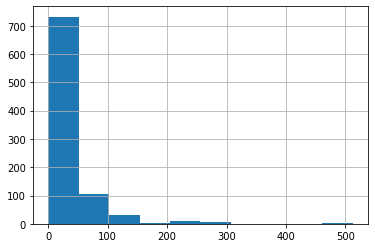

In [7]:
## Plotting Fare distribution and checking counts across new binned column
## Since distribution is highly skewed, most passengers are falling into 'Low' band
df['Fare'].hist()
df['Fare_Bin'] = pd.cut(x = df['Fare'], bins = 3, labels = ['Low', 'Mid', 'High'])
print(df['Fare_Bin'].value_counts())

## Qcut

Similar to cut function, qcut helps in binning continuous values but with same bin-size. The bin-size would be decided basis rank or quantile value.

In [9]:
##### It can be seen that approximately 33% of data is distributed across all bins 
##since number of bins (q parameter) was set to 3
df['Fare_Bin2'] = pd.qcut(df['Fare'], q = 3, labels = ['Low', 'Mid', 'High'])
print(df['Fare_Bin2'].value_counts(normalize = True))

Low     0.345679
High    0.331089
Mid     0.323232
Name: Fare_Bin2, dtype: float64


## Get_Dummies

One-hot enconding is useful in many ML applications and this function provides in easy way of doing it.

In [12]:
## Converted 'Embarked' column into one-hot encoded variables and joined back with original data for display
embarked = pd.get_dummies(df['Embarked'])
pd.concat([df[['Embarked']], embarked], axis = 1).sample(5)

,Embarked,C,Q,S
876,S,0,0,1
512,S,0,0,1
366,C,1,0,0
674,S,0,0,1
767,Q,0,1,0


## Concat

I already used this method in previous function which shows how this one is useful for smoothly joining data frames with equal sizes. This method can also be performed with unequally sized dataframe, though that will generate missing values and would require additional treatment to fill those missing values.

Important thing to notice here is the 'axis' argument of this method, which sets the axis along which data frames would be joined. Different axis choices (0 or 1) would generate different results and user needs to carefully choose the right axis for correct results.

In [13]:
##### Result of concatinating along rows (axis = 0)
##similar results can be expected when dataframes of unequal dimensions are joined

pd.concat([df[['Embarked']], embarked], axis = 0).sample(10)

C:\Users\ADA74\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,C,Embarked,Q,S
662,0.0,NaN,0.0,1.0
250,NaN,S,NaN,NaN
527,NaN,S,NaN,NaN
380,1.0,NaN,0.0,0.0
666,0.0,NaN,0.0,1.0
808,0.0,NaN,0.0,1.0
821,NaN,S,NaN,NaN
560,0.0,NaN,1.0,0.0
786,NaN,S,NaN,NaN
609,0.0,NaN,0.0,1.0


# Conclusion

This notebook is just the first one in series of learning on Pandas. There are many more to come.

I hope it was helpful!!!